# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

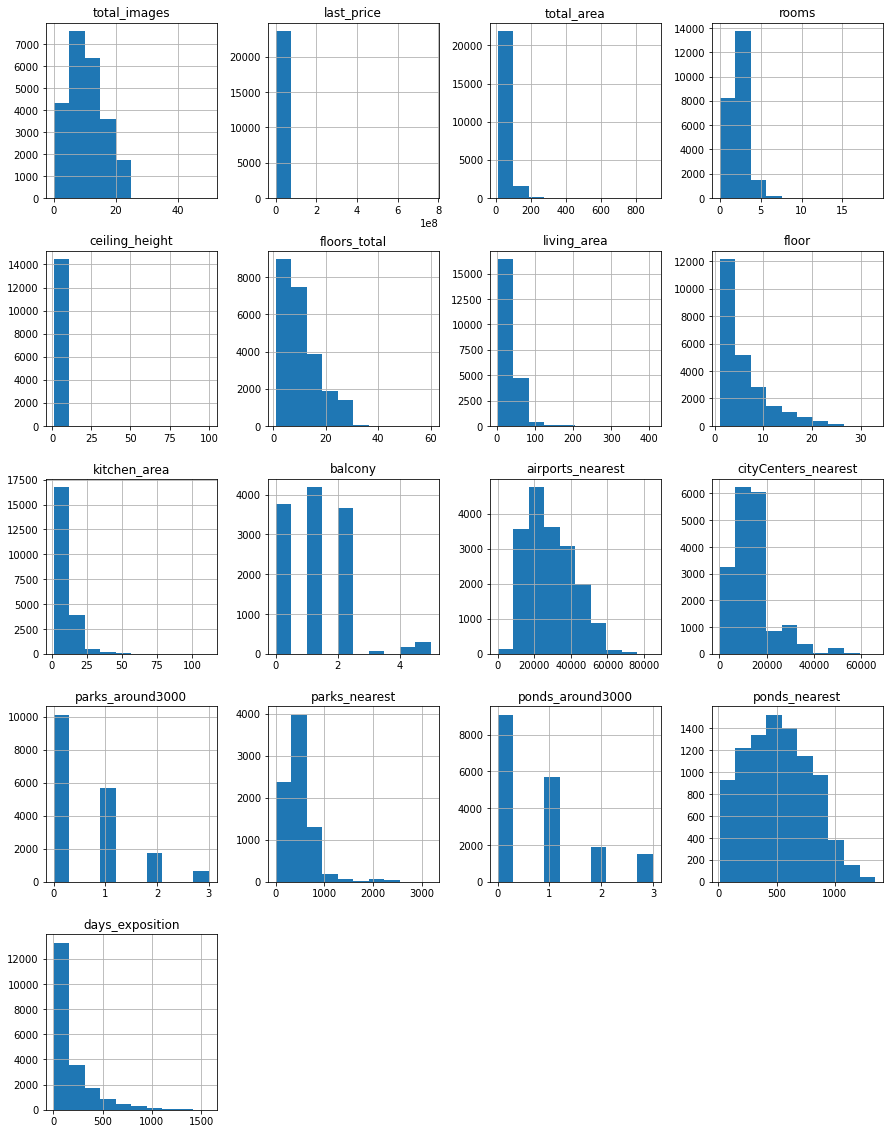

In [3]:
data.hist(figsize=(15, 20))

### выводим на экран количество пропусков в данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### изменяем типы данных где нету пропусков и дополняем данные столбацами по ценовой категории и локальной категории

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [6]:
data['last_price'] = data['last_price'].astype('int') #привели цену к типу инт

In [7]:
data['price'] = data['last_price'] / 1000

In [8]:
data['price'] = data['price'].astype('int')
data['price'].describe()

count     23699.000000
mean       6541.532723
std       10887.008378
min          12.000000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: price, dtype: float64

In [9]:
#функция для деления на ценовые категории
def price_cat(price):
    if price <= 5000:
        return 'C'
    if 5001 <= price <= 20000:
        return 'B'
    if 20001 <= price <= data['price'].max():
        return 'A'
    
data['price_category'] = data['price'].apply(price_cat)

#форматируем названия населенных пунктов
data['locality_name'] = data['locality_name'].str.lower()

In [10]:
#удаляем строчки в стобце с названиями населенных пунктов и количество этажей, так как пропуски данных <1%
data = data.dropna(subset=['locality_name', 'floors_total']).reset_index(drop=True)

In [11]:
#функция возвращающая тип населенного пункта
def locality_cat(name):
    if 'деревня' in name:
        return 'деревня'
    if 'поселок' in name or 'посёлок' in name:
        return 'поселок'
    else:
        return 'город'
data['locality_category'] = data['locality_name'].apply(locality_cat)

In [12]:
#число объявлений для каждой ценовой категории
data_count_price = data.groupby('price_category')['price_category'].count()
data_count_price

price_category
A      704
B     9498
C    13363
Name: price_category, dtype: int64

In [13]:
#число объявлений для каждой ценовой категории
data_count_price = data.groupby('locality_category')['locality_category'].count()
data_count_price

locality_category
город      19971
деревня      944
поселок     2650
Name: locality_category, dtype: int64

In [14]:
data_village = data[data['locality_category'] == 'деревня']
data_village.isna().sum()

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height          433
floors_total              0
living_area              92
floor                     0
is_apartment            830
studio                    0
open_plan                 0
kitchen_area            127
balcony                 419
locality_name             0
airports_nearest        944
cityCenters_nearest     944
parks_around3000        944
parks_nearest           944
ponds_around3000        944
ponds_nearest           944
days_exposition         110
price                     0
price_category            0
locality_category         0
dtype: int64

Видим, что количество пропусков в стобцах (аеропорт, парки и тд) совпадают с количеством строк с категорией 'деревня', вероятно эти пропуски остались из за незаполненных параметров, можно заменить на 0


Пропуски могли появится всвязи с технической ошибкой, человеческим фактором (невнимательностью) или с нежелением человека указывать какой то из параметров (как например не указывать число балконов из за их остутсвия). В данных, в которых мог возникнуть пропуск из за нежелания вносить число/значение в параметр за остуствием того в квартире/доме мы можем заполнить пропуски нулями. В данных с количественными переменными мы можем заполнить пропуски медианным значением или медианным по категории. В некоторых категориальных переменных, таких как название населенного пунка мы не можем подобрать среднее или медианное значение, поэтому с моей точки зрения их можно удалить, так как пропусков в этом столбце всего 49. Зато этот столбец богат на неочевидные дубликаты.

# Заполняем пропуски в данных

In [15]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Некоторые значения (начиная от 10 метров), можем считать аномальными и написанными случайно, вероятно, что эти значения в действительности в 10 раз меньше

In [16]:
#корректируем выбросы с высокими потолками
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10
ceiling_med = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_med)

In [17]:
#удалим небольшое количество данных (отчистим данные от потолков до 2-ух и больше 4.5 метров)
data = data.loc[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 4.5)]
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59,
       2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12,
       2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53,
       2.83, 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48,
       2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87,
       3.66, 3.85, 3.86, 4.19, 3.24, 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37,
       3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27,
       4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 ,
       3.28, 3.04, 4.45, 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39,
       2.69, 3.31, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.99, 3.49, 4.14, 2.91,
       3.88, 4.25, 3.29, 2.25, 3.76, 3.69, 2.26, 2.

In [18]:
print(data['living_area'].corr(data['total_area']))
print(data['kitchen_area'].corr(data['total_area']))

0.938894543810322
0.6082560205541719


Значения площади кухни и жилого помещения неплохо коррелируется со значением всей площади, поэтому пропуски значений в столбцах (living_area, kitchen_area) можно заполнить медианными значениями отношения кухни/жилого помещения ко всей площади.

In [19]:
#отношение кухни и жилой площади к всей площади
data_kit_med = ((data['kitchen_area'] / data['total_area']) * 100).median()
data_liv_med = ((data['living_area'] / data['total_area']) * 100).median()
data['kitchen_area'] = data['kitchen_area'].fillna(data_kit_med)
data['living_area'] = data['living_area'].fillna(data_liv_med)

In [20]:
print(data_kit_med)
print(data_liv_med)

17.235494880546074
56.81818181818182


### Значения полностью зависящие от территориальной расположенности лучше заполнить медианной по территориальному признаку 

In [21]:
#заполняем дальность до парка медианным значением
for i in data['locality_category'].unique():
    data.loc[(data['locality_category'] == i) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_category'] == i), 'parks_nearest'].median() 

#заполняем дальность до пруда медианным значением
for i in data['locality_category'].unique():
    data.loc[(data['locality_category'] == i) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_category'] == i), 'ponds_nearest'].median()     

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [22]:
#заполняем количество парков в радиусе 3000м медианным значением
for i in data['locality_category'].unique():
    data.loc[(data['locality_category'] == i) & (data['parks_around3000'].isna()), 'parks_around3000'] = \
    data.loc[(data['locality_category'] == i), 'parks_around3000'].median() 

#заполняем количество прудов в радиусе 3000м медианным значением
for i in data['locality_category'].unique():
    data.loc[(data['locality_category'] == i) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = \
    data.loc[(data['locality_category'] == i), 'ponds_around3000'].median()   

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [23]:
#заполняем дальность до аеропорта медианным значением
for i in data['locality_category'].unique():
    data.loc[(data['locality_category'] == i) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_category'] == i), 'airports_nearest'].median() 

#заполняем дальность до центра города медианным значением
for i in data['locality_category'].unique():
    data.loc[(data['locality_category'] == i) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_category'] == i), 'cityCenters_nearest'].median()   
      

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [24]:
#заполняем значения с количеством дней расположения объявления
exposition_med = data['days_exposition'].median()
print(exposition_med)
data['days_exposition'] = data['days_exposition'].fillna(exposition_med)

95.0


In [25]:
#заполняем балконы нулями и переводим в тип 'int'
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'].unique())

[0 2 1 5 4 3]


In [26]:
#заполняем пропуски в апартаментах
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
data['is_apartment'] = data['is_apartment'].astype('int')

In [27]:
data.duplicated().sum()


0

### Посчитайте и добавьте в таблицу новые столбцы

In [28]:
#цена за квадратый метр
data['one_metr_price'] = data['total_area'] / data['price']

In [29]:
#функция записывает тип этажа (первый, последний, другой)
def level(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
data['floor_type'] = data.apply(level, axis=1)

In [30]:
#столбцы с днем недели, месяцом, годом
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [31]:
data = data.dropna()

In [32]:
#расстояние до центра города в километрах
data['km_cityCenters'] = data['cityCenters_nearest'] / 1000
data['km_cityCenters'] = data['km_cityCenters'].astype('int')

In [33]:
data['km_cityCenters'].head()

0    16
1    18
2    13
3     6
4     8
Name: km_cityCenters, dtype: int64

In [34]:
data['floors_total'] = data['floors_total'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

In [35]:
print(data.isna().sum())

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
price                   0
price_category          0
locality_category       0
one_metr_price          0
floor_type              0
weekday                 0
month                   0
year                    0
km_cityCenters          0
dtype: int64


# Задания

### описание параметров

#### общая площадь

count    22580.000000
mean        60.679356
std         35.808990
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

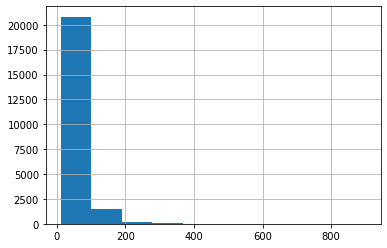

In [36]:
print(data['total_area'].describe())
data['total_area'].hist()

In [37]:
data_total = data[data['total_area'] >= 200]
print(len(data_total))
print(len(data_total[data_total['price_category'] == 'A']))

222
179


Среднее и медиана различаются, но не сильно, квартир с площадью 200 - 900 кв.м. гораздо меньше чем остальных, но при близком изучени мы видим, что это довольно дорогие квартиры класса 'А' (по моей классификации), с большим количеством комнат. К тому же, после поисков в гугле квартир с площадью 900кв.м., можно сказать, что такие действительно есть в продаже, а значит как минимум проверку реальностью они прошли

#### жилая площадь

count    22580.000000
mean        36.424169
std         22.021580
min          2.000000
25%         19.300000
50%         31.300000
75%         46.200000
max        409.700000
Name: living_area, dtype: float64

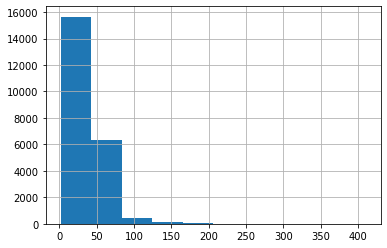

In [38]:
data['living_area'].hist()
data['living_area'].describe()

Среднее и медиана тоже различаются не сильно, но есть странное минимальное значение в 2кв.м. Информация из интернета говорит, что: "Согласно действующим СНиПам, минимальная площадь комнаты должна быть не менее 8 квадратных метров." Посмотрим, сколько значений жилой площади меньше 8кв.м. (Таких квартир всего 8, можно было удалить, но 8 значений не должны сильно влиять на данные)

In [39]:
print(len(data[data['living_area'] < 8]))

8


#### площадь кухонь

count    22580.000000
mean        11.190274
std          5.986552
min          1.300000
25%          7.200000
50%         10.000000
75%         13.500000
max        112.000000
Name: kitchen_area, dtype: float64

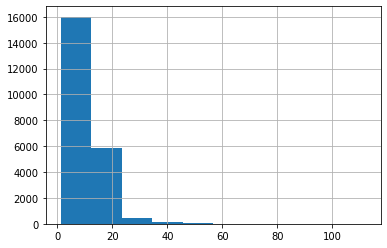

In [40]:
data['kitchen_area'].hist()
data['kitchen_area'].describe()

Медиана и среднее не почти не отличаются, выбросов нет, средняя площадь кухни - 10 кв.м.

#### цена

count    2.258000e+04
mean     6.642443e+06
std      1.096908e+07
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.900000e+06
max      7.630000e+08
Name: last_price, dtype: float64

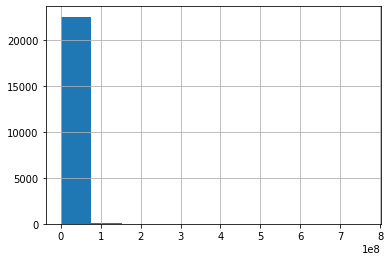

In [41]:
data['last_price'].hist()
data['last_price'].describe()

#### количество комнат

count    22580.000000
mean         2.084765
std          1.082818
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

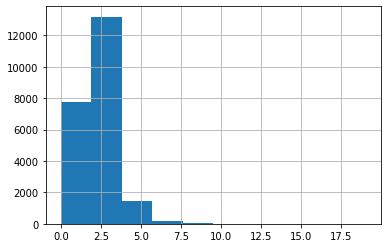

In [42]:
data['rooms'].hist()
data['rooms'].describe()

Среднее и медиана совпадают, в данных нет выбросов. Данные говорят о том, что чаще всего встречаются квартиры с 2-мя комнатами

#### высота потолков

count    22580.000000
mean         2.697152
std          0.213779
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.450000
Name: ceiling_height, dtype: float64

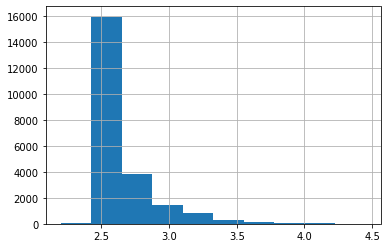

In [43]:
data['ceiling_height'].hist()
data['ceiling_height'].describe()

На этапе предобработки мы отсекли потолки ниже 2 и выше 4.5, средняя высота потолков 2.6. Среднее равно медиане

#### этаж

count    22580.000000
mean         5.875598
std          4.859656
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

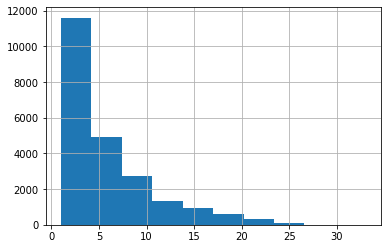

In [44]:
data['floor'].hist()
data['floor'].describe()

Медиана и среднее почти одинаково, подавляющее количество этажей в обьявлениях около 5, возможно из за того, что в городах и тем более поселках, квартиры являются сталинками (4-7 этажей)

#### всего этажей

count    22580.000000
mean        10.674314
std          6.566604
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

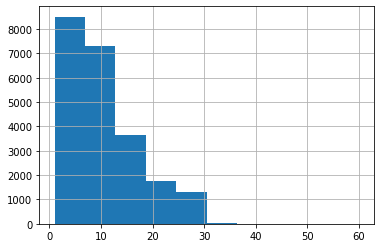

In [45]:
data['floors_total'].hist()
data['floors_total'].describe()

Медиана и среднее почти не отличаются, большое количество общей этажности от 1 - 17, это объясняется информацией из интернета:"Наибольшая доля жилищного строительства в России сегодня приходится на дома высотой 13—17 этажей: они составляют 27% от всей площади строящегося жилья."

count      22580
unique         3
top       другой
freq       16648
Name: floor_type, dtype: object

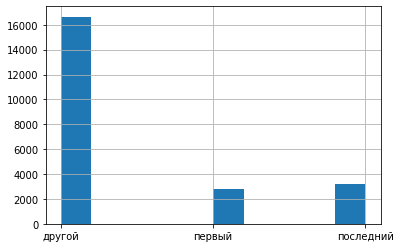

In [46]:
data['floor_type'].hist()
data['floor_type'].describe()

Больше всего значений с типом 'другой', значений с типом 'первый' и 'последний' в районе 2700 и 3000

#### Расстояние до центра города

count    22580.000000
mean        14.048937
std          7.976312
min          0.000000
25%         10.000000
50%         12.000000
75%         16.000000
max         65.000000
Name: km_cityCenters, dtype: float64

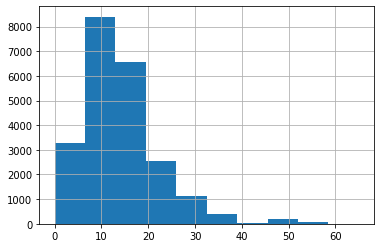

In [47]:
data['km_cityCenters'].hist()
data['km_cityCenters'].describe()

In [48]:
data_p = data[data['km_cityCenters'] < 0.200000]
data_p

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price,price_category,locality_category,one_metr_price,floor_type,weekday,month,year,km_cityCenters
489,18,95000000,216.0,2017-12-05,4,3.00,5,86.0,4,0,...,14,95000,A,город,0.002274,другой,1,12,2017,0
657,3,49950000,483.9,2017-10-04,7,3.20,6,312.5,4,0,...,391,49950,A,город,0.009688,другой,2,10,2017,0
746,9,29500000,188.8,2017-03-04,7,2.70,2,119.3,1,0,...,246,29500,A,город,0.006400,первый,5,3,2017,0
1081,16,75000000,323.0,2017-07-10,5,4.00,5,255.7,4,0,...,259,75000,A,город,0.004307,другой,0,7,2017,0
1099,0,7970000,63.0,2018-02-09,3,2.65,5,35.0,3,0,...,15,7970,B,город,0.007905,другой,4,2,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21453,13,12300000,120.0,2018-09-21,4,3.10,4,78.0,4,0,...,95,12300,B,город,0.009756,последний,4,9,2018,0
21911,3,7200000,72.0,2017-12-21,2,3.07,3,44.9,2,0,...,89,7200,B,город,0.010000,другой,3,12,2017,0
22405,10,8000000,72.7,2018-02-02,3,3.05,4,40.5,4,0,...,199,8000,B,город,0.009088,последний,4,2,2018,0
22407,11,9000000,69.5,2017-06-27,4,2.70,4,50.3,4,0,...,21,9000,B,город,0.007722,последний,1,6,2017,0


Среднее почти не отличается от медианы. Квартир расположенных от центра города от 0 до 7 км меньше чем квартир которые сдаются от 7 до 12 км

#### Расстояние до аеропорта

count    22580.00000
mean     28301.68822
std      11334.07827
min          0.00000
25%      20609.25000
50%      26835.00000
75%      35099.00000
max      84869.00000
Name: airports_nearest, dtype: float64

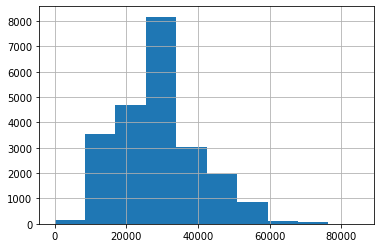

In [49]:
data['airports_nearest'].hist()
data['airports_nearest'].describe()

In [50]:
data_q = data[data['airports_nearest'] == 0]
data_q

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price,price_category,locality_category,one_metr_price,floor_type,weekday,month,year,km_cityCenters
20968,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,0,...,60,7000,B,город,0.004957,другой,6,9,2018,22


У одного объявления расстояние до аэропорта равно 0, вряд ли это действительно так, вероятно продавец просто забыл рассчитать и вписать этот параметр. медиана и среднее примерно одинаково

#### расстояние до ближайшего парка

count    22580.000000
mean       495.506776
std        217.239531
min          1.000000
25%        454.000000
50%        454.000000
75%        524.000000
max       3190.000000
Name: parks_nearest, dtype: float64

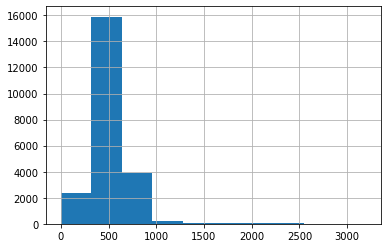

In [51]:
data['parks_nearest'].hist()
data['parks_nearest'].describe()

In [52]:
data_park = data[data['parks_nearest'] == 1]
data_park

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price,price_category,locality_category,one_metr_price,floor_type,weekday,month,year,km_cityCenters
14539,8,3770000,45.4,2019-03-20,2,2.65,9,28.43,2,0,...,42,3770,C,город,0.012042,другой,2,3,2019,16


Медиана и среднее примерно одинаковы, в одном объялении расстояние до парка 1метр, вряд ли дом построен в парке, возможно ошибка при заполнении параметра

#### день и месяц

count    22580.000000
mean         2.567050
std          1.787352
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

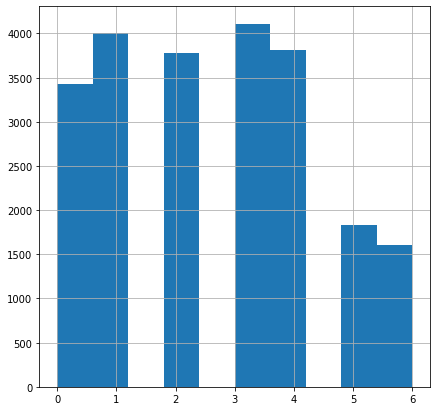

In [53]:
data['weekday'].hist(figsize= (7, 7))
data['weekday'].describe()

В большей степени объявления публикуются с понедельника по пятницу, в субботу и воскресение публикуются в два раза меньше

count    22580.000000
mean         6.404030
std          3.486334
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

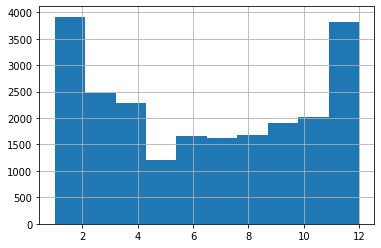

In [54]:
data['month'].hist()
data['month'].describe()

Больше всего объявлений публикуются зимой

count    22580.000000
mean      2017.375819
std          1.039731
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

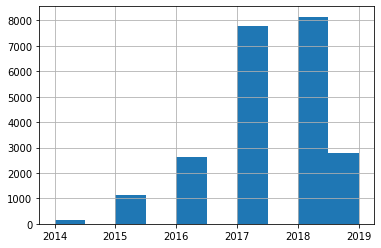

In [55]:
data['year'].hist()
data['year'].describe()

С каждым годом, количество публикаций в год увеличивается, возможно это связано с тем, что с каждым годом, все больше людей узнает о платформе для размещения объявлений.

количество объявлений с 15 по 19 год выросло.

count    22580.000000
mean       168.689770
std        206.209963
min          1.000000
25%         45.000000
50%         95.000000
75%        197.000000
max       1572.000000
Name: days_exposition, dtype: float64

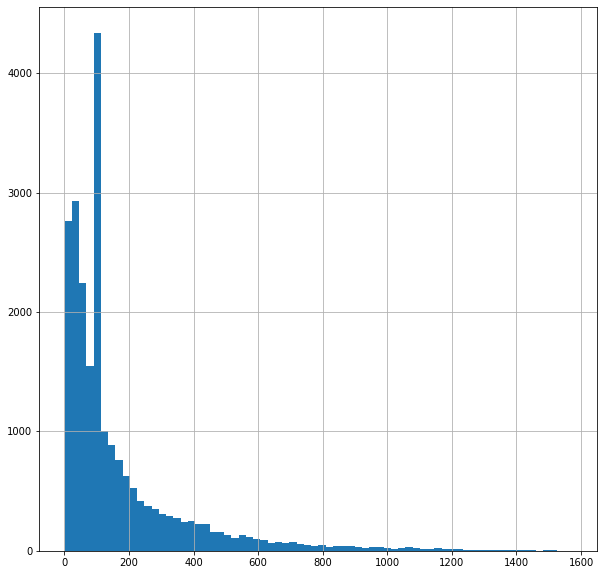

In [56]:
data['days_exposition'].hist(bins=70, figsize=(10, 10))
data['days_exposition'].describe()

- Большое количество объявлений 'висит' на сайте около 95 - 100 дней. На гистограмме виден выброс в районе 95-100, Большое количество значений в этом диапозоне влияет на большой разрыв между средним и медианой. Максимальное значение 1580. Вероятно, большие значения имеют место быть, так как продавец может установить большую (несправедливую цену) при скудных параметрах, как в плане площади, так и в параметрах зависящих от территориальной расположенности. Среднее 169, медиана 95

# Факторы влияющие на полную стоимость

In [57]:
data_scatter = data[data['price'] < 100000]

Сократим выборку для построения граффика, чтобы убрать ценовые выбросы

<AxesSubplot:xlabel='total_area', ylabel='price'>

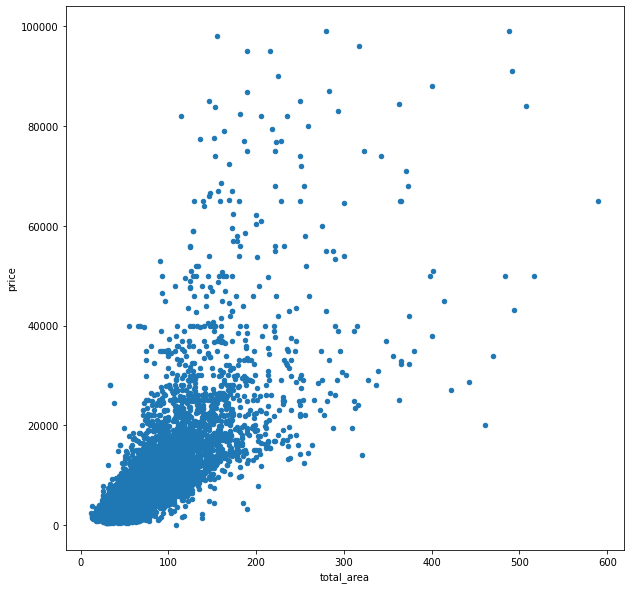

In [58]:
data_scatter.plot(x='total_area', y='price', kind='scatter', figsize=(10, 10))

In [59]:
print((data['price']).corr(data['total_area']))

0.6499969011991683


диаграмма показывае, что с ростом жилой площади растет и цена, корреляция - 0.65

### жилая площадь

<AxesSubplot:xlabel='price', ylabel='living_area'>

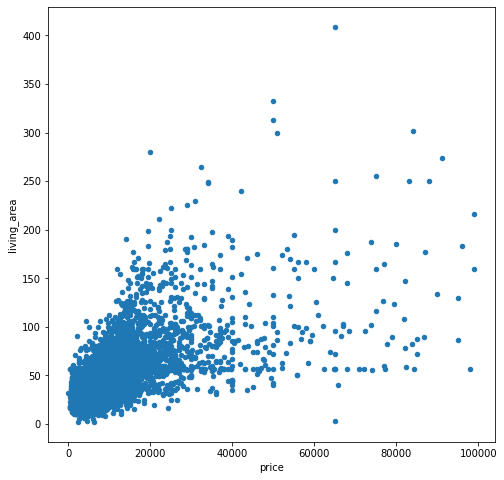

In [60]:
data_scatter.plot(x='price', y='living_area', kind='scatter', figsize=(8, 8))

In [61]:
print(data['living_area'].corr(data['price']))

0.5201400525177746


На диаграмме видно, что с ростом жилой площади растет и цена, но не с такой большой корреляцией (0.5) как вся плоащдь

### кухня

<AxesSubplot:xlabel='price', ylabel='kitchen_area'>

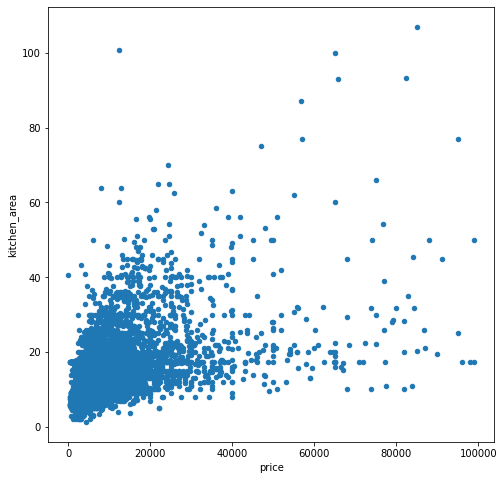

In [62]:
data_scatter.plot(x='price', y='kitchen_area', kind='scatter', figsize=(8, 8))

In [63]:
print(data['kitchen_area'].corr(data['price']))

0.4160955987046591


Корреляция - 0.4, тем не менее мы видим прогрессию цены вместе с площадью кухни

### количество комнат

<AxesSubplot:xlabel='price', ylabel='rooms'>

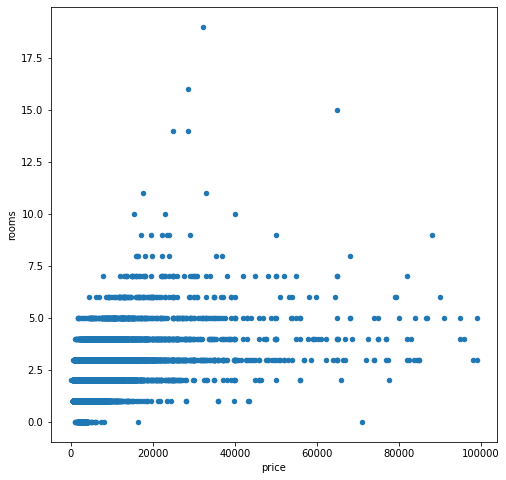

In [64]:
data_scatter.plot(x='price', y='rooms', kind='scatter', figsize=(8, 8))

In [65]:
print(data['price'].corr(data['rooms']))

0.3603833410276938


Корреляция 0.36, линии комнат на гистограмме с ростом количества комнат становятся длиней и стремятся вправо, от 5 комнат и больше, видно, что коррелция теряется

### тип этажа

<AxesSubplot:xlabel='price', ylabel='floor_type'>

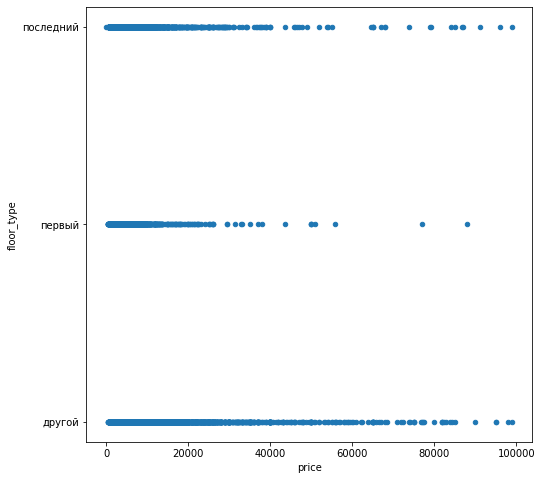

In [66]:
data_scatter.plot(x='price', y='floor_type',kind='scatter', figsize=(8, 8))

In [67]:
print(data.groupby('floor_type')['floor_type'].count())

floor_type
другой       16648
первый        2770
последний     3162
Name: floor_type, dtype: int64


График показывает, что у типа этажа 'другой' больше корреляция с ценой, но надо учитывать, что в этом типе в разы больше значений 

### даты размещения

<AxesSubplot:xlabel='price', ylabel='first_day_exposition'>

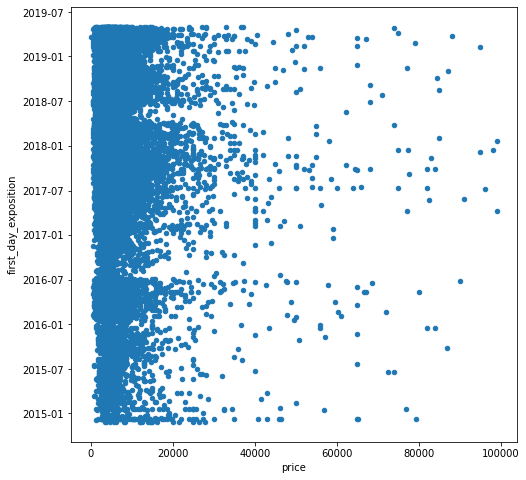

In [68]:
data_scatter.plot(x='price', y='first_day_exposition', kind='scatter', figsize=(8, 8))

In [69]:
print(data['price'].corr(data['first_day_exposition'].dt.day))
print(data['price'].corr(data['first_day_exposition'].dt.month))
print(data['price'].corr(data['first_day_exposition'].dt.year))

0.010184294591555856
0.00234615382674312
-0.04441974361670204


Даты публикации не имеют корреляции вообще

In [70]:
# оставляем только названия населенных пунктов
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('поселок городского типа ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('посёлок городского типа ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('поселок ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('посёлок ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('городской ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('пок ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('деревня ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('при железнодорожной станции ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('коттеджный ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('садоводческое некоммерческое товарищество ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('садовое товарищество ', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('станции ', '', regex=True)

In [71]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Коммунар',
       'Колпино', 'Красный Бор', 'Гатчина', 'Выборг', 'Кронштадт',
       'Кировск', 'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Аннино', 'Ефимовский',
       'Плодовое', 'Торковичи', 'Первомайское', 'Красное Село',
       'Понтонный', 'Сясьстрой', 'Новый Свет', 'Сланцы', 'село Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Кудрово', 'Романовка', 'Бугры', 'Рощино',
       'Кириши', 'Луга', 'Волосово', 'Отрадное', 'село Павлово', 'Оредеж',
       'село Копорье', 'Молодёжное', 'Тихвин', 'Победа', 'Синявино',
       'Тосно', 'Стрельна', 'Бокситогорск', 'Александровская', 'Пикалёво',
       'Терволово', 'Советский', 'Подпорожье', 'Петровское', 'Токсово',
       'Сельцо', 'В

In [72]:
data_gr = data.pivot_table(index='locality_name', values='one_metr_price', aggfunc=['count', 'mean'])
data_gr.columns=['count', 'mean']
data_gr = data_gr.sort_values('count', ascending=False).head(10)
data_gr

,count,mean
locality_name,,
Санкт-Петербург,15624,0.010110
Мурино,586,0.011983
Шушары,439,0.013123
Всеволожск,397,0.015338
Пушкин,369,0.010046
Колпино,338,0.013590
Парголово,327,0.011567
Гатчина,307,0.015616
Выборг,234,0.018191


In [73]:
print(data_gr.query('mean == mean.max()'))
print(data_gr.query('mean == mean.min()'))

               count      mean
locality_name                 
Выборг           234  0.018191
               count      mean
locality_name                 
Пушкин           369  0.010046


Среди 10 городов с самым большим количеством объявлений, городом с самой высокой ценой за квадратный метр стал Выборг.
А с самой низкой ценой за квадратный метр, стал г.Пушкин

In [74]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
data_spb = data_spb[data_spb['price'] < 150000]
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price,price_category,locality_category,one_metr_price,floor_type,weekday,month,year,km_cityCenters
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,0,...,95,13000,B,город,0.008308,другой,3,3,2019,16
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,0,...,558,5196,B,город,0.010778,другой,3,8,2015,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,56.818182,9,0,...,424,64900,A,город,0.002450,другой,4,7,2015,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,0,...,121,10000,B,город,0.010000,другой,1,6,2018,8
7,5,7915000,71.6,2019-04-18,2,2.65,24,56.818182,22,0,...,95,7915,B,город,0.009046,другой,3,4,2019,11


<AxesSubplot:xlabel='price', ylabel='km_cityCenters'>

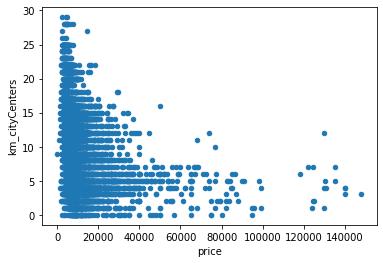

In [75]:

data_spb['km_cityCenters'] = data_spb['km_cityCenters'].astype('int')
data_spb.plot(kind='scatter', x='price', y='km_cityCenters')

<AxesSubplot:>

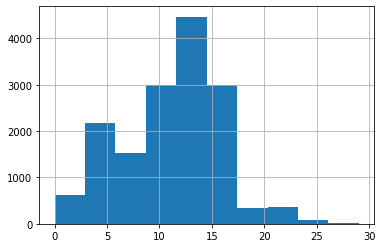

In [76]:
data_spb['km_cityCenters'].hist()

In [77]:
data_spb_metr = data_spb.pivot_table(index='km_cityCenters', values='price')
data_spb_metr

,price
km_cityCenters,
0,20202.833333
1,16020.192308
2,14429.019672
3,11712.817658
4,13283.686667
5,13705.464474
6,13340.825806
7,11793.444444
8,8420.888889


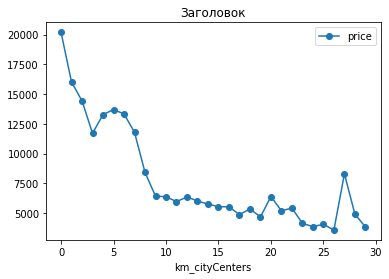

In [78]:
data_spb_metr.plot(style='o-', title = 'Заголовок')
plt.show()

Для удобства я отбросил квартиры с высокими ценами, их там несколько штук. Сделал сводную таблицу по километрах и вывел среднюю цену для каждого.

Вывод: конечно в соседних индексах можно заметить, что значения могут не особо менятся, а некоторые даже растут с удалением от центра, но общая тенденция на всей 'дистанции'  - квартиры дешевеют.

**Общий вывод:**
- Самым важным фактором в ценообразовании квартиры влияют параметры связанные с площадью. Корреляция всей площади по отношению к росту цены равна 0.65

- По мере удаления от центра города, цена за 1 км постепенно снижается, но самый резкий спад значений наблюдается в районе от 7 до 8 километров от центра. Так же можно увидеть выброс на 27-ом километре (8300).

- Если разбить населенные пункты на группы и искать пропущенные значения для каждой, можно заметить, что в группе 'деревня' все значения связанные с аэропортами, парками, прудами и расстоянием от центра  - пропущены. Возможно продавцы просто не вписывают эти значения тк вблизи нету атрибутов соответсвующих этим параметрам.

- При проверке прошу заметить, что я сделал новый столбец price в котором значения last_price поделил на 1000, мне так удобней было

- С большим отрывом, больше всего объявлений из города Санкт-Петербург

- Пропуски в данных могли возикнуть из за незаполненых параметров при публикации объявления

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод